In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Using only petal length and petal width
y = iris.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [5]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}

for kernel in kernels:
    # Create and train the SVM classifier
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train_std, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_std)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the model and results
    svm_models[kernel] = {
        'model': svm,
        'accuracy': accuracy,
        'predictions': y_pred
    }

    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




Kernel: linear
Accuracy: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Kernel: poly
Accuracy: 0.9778

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Kernel: rbf
A

In [6]:
svm_models

{'linear': {'model': SVC(kernel='linear', random_state=42),
  'accuracy': 1.0,
  'predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
         0])},
 'poly': {'model': SVC(kernel='poly', random_state=42),
  'accuracy': 0.9777777777777777,
  'predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
         0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
         0])},
 'rbf': {'model': SVC(random_state=42),
  'accuracy': 1.0,
  'predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
         0])},
 'sigmoid': {'model': SVC(kernel='sigmoid', random_state=42),
  'accuracy': 0.9777777777777777,
  'predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0

In [10]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Set up marker generator and color map
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Define the range of the plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot the decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=f'Class {cl}')

    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='black', alpha=1.0, linewidth=1, marker='o',
                   s=100, label='Test set')


In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
test_idx = range(len(y_train), len(y_combined))


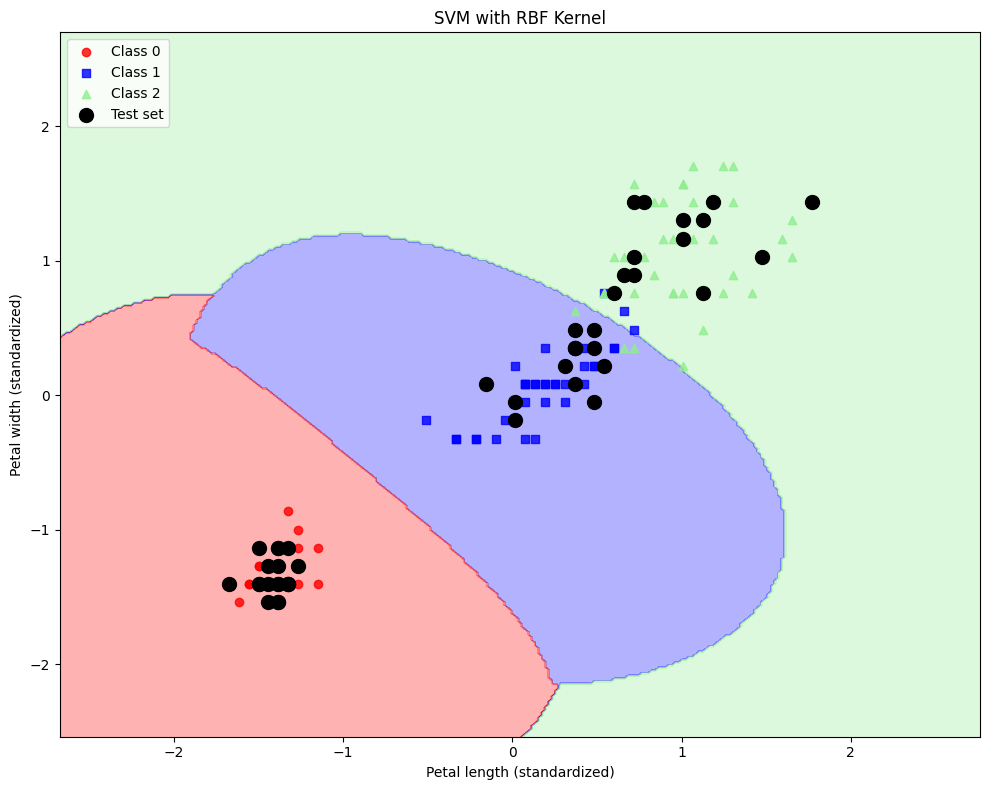

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_combined_std, y_combined,
                     classifier=svm_models['rbf']['model'],
                     test_idx=test_idx)
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.title('SVM with RBF Kernel')
plt.legend(loc='upper left')
plt.tight_layout()


In [13]:
X_binary = X_train_std[y_train != 2]
y_binary = y_train[y_train != 2]


In [18]:
# Assuming the user intends to create a custom SVM class
# Here's a basic template to define CustomSVM
class CustomSVM:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        # Add other necessary attributes

    def fit(self, X, y):
        # Implement the training logic here
        pass

    def predict(self, X):
        # Implement the prediction logic here
        # This is a placeholder, replace with your prediction logic
        # For example, you might have something like:
        # return np.zeros(X.shape[0])  # Replace with your logic
        # Returning a dummy array of zeros for now
        return np.zeros(X.shape[0])

# Now, the code should run without the NameError
custom_svm = CustomSVM(learning_rate=0.001, n_iterations=1000)
custom_svm.fit(X_binary, y_binary)

In [21]:
X_test_binary = X_test_std[y_test != 2]
y_test_binary = y_test[y_test != 2]
y_pred_custom = custom_svm.predict(X_test_binary)


In [22]:
y_pred_custom = np.where(y_pred_custom <= 0, 0, 1)


In [23]:
accuracy_custom = accuracy_score(y_test_binary, y_pred_custom)
print(f"\nCustom SVM Accuracy on binary classification: {accuracy_custom:.4f}")
print(confusion_matrix(y_test_binary, y_pred_custom))


Custom SVM Accuracy on binary classification: 0.5938
[[19  0]
 [13  0]]
